# Test run pipeline
Starting from calints run entire pipeline and preview results plots

In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.dirname(os.getcwd())))

from src.utility.h5_serializable_file import H5Serializable
import src.utility.utils as utils 
from uncertainties import ufloat
from src.photometry_data import PhotometryData
from src.utility.run_cfg import ErebusRunConfig
from src.erebus import Erebus
import numpy as np
import matplotlib.pyplot as plt

In [2]:
lhs1478b = ErebusRunConfig.load("./lhs1478b_run.yaml")

In [3]:
erebus = Erebus(lhs1478b, force_clear_cache=False)

Circular orbit: using gaussian prior for t_sec
Predicted t_sec: 0.0879+/-0.0004
Visit jw03730012001 already ran


### Plotting initial guess

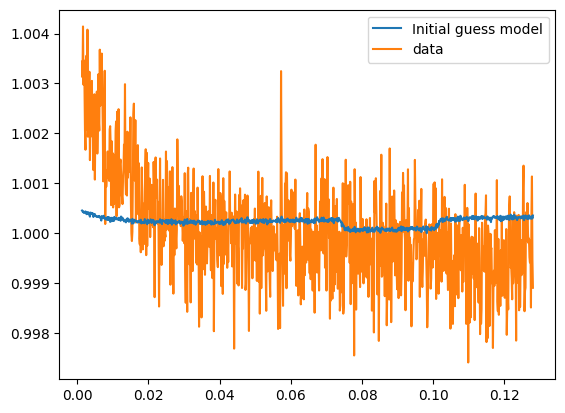

In [4]:
fit = erebus.individual_fits[0]
mcmc = fit.mcmc
initial_guess = np.array([mcmc.params[p].value for p in mcmc.params])[:-1]

t = fit.time
f = fit.raw_flux
f_model = fit.fit_method(t, *initial_guess)

plt.plot(t, f_model, label='Initial guess model', zorder=3)
plt.plot(t, f, label='data')
plt.legend()
plt.show()

In [ ]:
erebus.run(output_folder="./test_output/", force_clear_cache=True)

Initial guesses: [0.08793104333977175, 0.0002, 2458786.75425, 0.0462, 16.119, 1.9495378, 87.452, 0.1, 0.1, 0.1, 0.1, 0.1, 0.001, 1e-06, 0.0004] variation: [0.00021000250147319675, 0.000325, 0.00021, 0.00055, 0.047, 2.05e-06, 0.026, 2.475, 2.475, 2.475, 2.475, 2.475, 0.49975, 0.0024997500000000002, 0.0001]
Initial likelihood: 3124.8668630132834
Fitting for 15 parameters
Moved away from starting positions
Initial guesses shape: (2, 64, 15)
Mean likelihood after moving: 5214.442174516773
process chain 0


100%|█████████████████████████████████████████████████████████████████████████████| 10000/10000 [01:58<00:00, 84.41it/s]


process chain 1


 89%|█████████████████████████████████████████████████████████████████████▎        | 8879/10000 [01:44<00:14, 76.98it/s]

In [ ]:
fit = erebus.individual_fits[0]
print(fit.order)

res = fit.results
res_nominal_values = [res[k].nominal_value for k in res][:-1]
physical_params = res_nominal_values[:9]
systematic_params = res_nominal_values[9:]

t = fit.time
f = fit.raw_flux
f_model = fit.fit_method(t, *res_nominal_values)
plt.plot(t, f_model, label='model', zorder=3)
plt.plot(t, f, linestyle='', marker='.', label='data')
plt.legend()
plt.show()

f_systematic = fit.systematic_model(t, *systematic_params)
plt.plot(t, f_model / f_systematic, label='model', zorder=3)
plt.plot(t, f / f_systematic, linestyle='', marker='.', label='data')
plt.legend()
plt.show()

print(res['fp']*1e6)